# Task-1

### Libraries and Given Dataset 

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
rs = np.random.get_state()
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

### Linear Regression and MSE fuctions

In [3]:
def reg(x,theta_0,theta_1):
    return theta_1*x + theta_0
def mse(y_hat,y):
    return torch.mean((y_hat-y)**2)

## 1.1 

Use ```torch.autograd``` to find the true gradient on the above dataset using linear regression (in the form $\theta_1x + \theta_0$) for any given values of $(\theta_0,\theta_1)$.

In [4]:
x1_torch = torch.from_numpy(x1)
y_torch = torch.from_numpy(y)
theta_0 = torch.tensor(1.0,requires_grad=True)
theta_1 = torch.tensor(0.0, requires_grad=True)

y_hat = reg(x1_torch,theta_0,theta_1)
loss = mse(y_hat,y_torch)
loss.backward()
theta_0_true_grad = theta_0.grad.item()
theta_1_true_grad = theta_1.grad.item()
print('The True gradient values of theta_0, theta_1:',theta_0_true_grad,theta_1_true_grad)

The True gradient values of theta_0, theta_1: -5.447053909301758 -1.1946825981140137


## 1.2

Using the same $(\theta_0,\theta_1)$ as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients.

In [5]:
t0_stochastic_gradients = []
t1_stochastic_gradients = []
for i in range(num_samples):
    theta_0.grad = None
    theta_1.grad = None
    y_hat = reg(x1_torch[i],theta_0,theta_1)
    loss = mse(y_hat,y_torch[i])
    loss.backward()
    t0_stochastic_gradients.append(theta_0.grad.item())
    t1_stochastic_gradients.append(theta_1.grad.item())

t0_avg_grad = sum(t0_stochastic_gradients)/num_samples
t1_avg_grad = sum(t1_stochastic_gradients)/num_samples
print('The True gradient values of theta_0, theta_1:',theta_0_true_grad,theta_1_true_grad)
print('The average value of stochastic gradient of theta_0, theta_1 for all points in the dataset:',t0_avg_grad,t1_avg_grad)

The True gradient values of theta_0, theta_1: -5.447053909301758 -1.1946825981140137
The average value of stochastic gradient of theta_0, theta_1 for all points in the dataset: -5.447053959220648 -1.194682613387704


show that the stochastic gradient is a good estimate of the true gradient.

In [6]:
print('The difference between avg of stochastic and true grad is',abs(theta_0_true_grad-t0_avg_grad),abs(theta_1_true_grad-t1_avg_grad))

The difference between avg of stochastic and true grad is 4.9918890354661016e-08 1.527369031251169e-08


## 1.3

Implement full-batch, mini-batch and stochastic gradient descent. Choose $\epsilon = 0.001$ for convergence criteria. Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods. 

In [39]:
def full_batch_grad(x,y,theta_0,theta_1,lr = 0.01,epsilon = 0.001,epochs = 15):
    t0_hist = [theta_0.item()]
    t1_hist = [theta_1.item()]
    losses = []
    epoch = 1
    loss = torch.tensor(float('inf'))
    if epochs is not None:
        while True:
            y_hat = reg(x,theta_0,theta_1)
            loss = mse(y_hat,y)
            losses.append(loss.item())
            loss.backward()
            with torch.no_grad():
                theta_0.data = theta_0-lr*theta_0.grad
                theta_1.data = theta_1-lr*theta_1.grad

            t0_hist.append(theta_0.item())
            t1_hist.append(theta_1.item())
            # print(f'Epoch:{epoch}--> Loss:{loss.item()}')
            theta_0.grad.zero_()
            theta_1.grad.zero_()
            epoch += 1
            if epoch>=epochs:
                break
            # if epoch>=400 and epoch%50 == 0:
            #     if losses[-5:].count(losses[-1])== 5:
            #         break
            # if len(losses) >2:
            #     if abs(losses[-1]-losses[-2])<epsilon:
            #         break
        # print(f'Full Batch Gradient Descent---->No of Epochs Caliculated:{epoch} Final loss:{losses[-1]}')
    else:
        while True:
            y_hat = reg(x,theta_0,theta_1)
            loss = mse(y_hat,y)
            losses.append(loss.item())
            loss.backward()
            with torch.no_grad():
                theta_0.data = theta_0-lr*theta_0.grad
                theta_1.data = theta_1-lr*theta_1.grad

            t0_hist.append(theta_0.item())
            t1_hist.append(theta_1.item())
            # print(f'Epoch:{epoch}--> Loss:{loss.item()}')
            theta_0.grad.zero_()
            theta_1.grad.zero_()
            epoch += 1
            # if epoch>=400 and epoch%50 == 0:
            #     if losses[-5:].count(losses[-1])== 5:
            #         break
            if len(losses) >=2:
                if abs(losses[-1]-losses[-2])<epsilon:
                    break
                
    
    return losses, theta_0.grad.item(), theta_1.grad.item(),t0_hist,t1_hist
def mini_batch_grad(x,y,theta_0,theta_1,lr = 0.01,batch_size = 2,epsilon = 0.001, epochs = 15):
    num_samples = x.size(0)
    theta_0 = torch.tensor(0.0,requires_grad=True)
    theta_1 = torch.tensor(0.0,requires_grad=True)
    t0_hist = [theta_0.item()]
    t1_hist = [theta_1.item()]
    losses = []
    avg_epoch_loss = float('inf')
    num_samples_per_batch = num_samples//batch_size
    epoch = 1
    if epochs is not None:
        while True:
            batch = torch.randperm(num_samples)
            epoch_loss = 0
            for i in range(0,num_samples, batch_size):
                indice = batch[i:i+batch_size]
                mini_x,mini_y = x[indice],y[indice]
                mini_y_hat = reg(mini_x, theta_0,theta_1)
                loss = mse(mini_y_hat,mini_y)
                epoch_loss += loss.item()
                loss.backward()
                with torch.no_grad():
                    theta_0.data -= lr*theta_0.grad
                    theta_1.data -= lr*theta_1.grad

                t0_hist.append(theta_0.item())
                t1_hist.append(theta_1.item())
                theta_0.grad.zero_()
                theta_1.grad.zero_()
            avg_epoch_loss = epoch_loss/num_samples_per_batch
            losses.append(avg_epoch_loss)
            # print(f'Epoch:{epoch}--> Avg Epoch Loss:{avg_epoch_loss}')
            epoch += 1
            if epoch >=epochs:
                break
            # if epoch>=400 and epoch%50 == 0:
            #     if losses[-5:].count(losses[-1])== 5:
            #         break
            # if len(losses) >2:
            #     if abs(losses[-1]-losses[-2])<epsilon:
            #         break
        # print(f'Mini Batch Gradient Descent---->No of Epochs Caliculated:{epoch} Final loss:{losses[-1]}')    
    else:
        while True:
            batch = torch.randperm(num_samples)
            epoch_loss = 0
            for i in range(0,num_samples, batch_size):
                indice = batch[i:i+batch_size]
                mini_x,mini_y = x[indice],y[indice]
                mini_y_hat = reg(mini_x, theta_0,theta_1)
                loss = mse(mini_y_hat,mini_y)
                epoch_loss += loss.item()
                loss.backward()
                with torch.no_grad():
                    theta_0.data -= lr*theta_0.grad
                    theta_1.data -= lr*theta_1.grad
                theta_0.grad.zero_()
                theta_1.grad.zero_()

                t0_hist.append(theta_0.item())
                t1_hist.append(theta_1.item())
            avg_epoch_loss = epoch_loss/num_samples_per_batch
            losses.append(avg_epoch_loss)
            # print(f'Epoch:{epoch}--> Avg Epoch Loss:{avg_epoch_loss}')
            epoch += 1
            # if epoch>=400 and epoch%50 == 0:
            #     if losses[-5:].count(losses[-1])== 5:
            #         break
            if len(losses) >=2:
                if abs(losses[-1]-losses[-2])<epsilon:
                    break

    
    return losses,theta_0.grad.item(),theta_1.grad.item(),t0_hist,t1_hist
    
def stochastic_grad(x, y,theta_0,theta_1, lr=0.01, epsilon=0.001, epochs= 15):
    num_samples = x.size(0)
    theta_0 = torch.tensor(0.0,requires_grad=True)
    theta_1 = torch.tensor(0.0,requires_grad=True)
    t0_hist = [theta_0.item()]
    t1_hist = [theta_1.item()]
    losses = []
    avg_epoch_loss = float('inf')
    epoch = 1
    if epochs is not None:
        while True:
            epoch_loss = 0
            for i in range(num_samples):
                y_hat = reg(x[i], theta_0,theta_1)
                loss =mse(y_hat, y[i])
                epoch_loss += loss.item()
                loss.backward()
                with torch.no_grad():
                    theta_0.data -= lr*theta_0.grad
                    theta_1.data -= lr*theta_1.grad

                t0_hist.append(theta_0.item())
                t1_hist.append(theta_1.item())
                theta_0.grad.zero_()
                theta_1.grad.zero_()
            avg_epoch_loss = epoch_loss/num_samples
            losses.append(avg_epoch_loss)
            # print(f'Epoch:{epoch}-->Avg Epoch Loss:{avg_epoch_loss}')
            epoch += 1
            if epoch>= epochs:
                break
            # if epoch>1000 and epoch%100 == 0:
            #     if losses[-5:].count(losses[-1])== 5:
            #         break
            # if len(losses) >2:
            #     if abs(losses[-1]-losses[-2])<epsilon:
            #         break
        # print(f'Stochastic Gradient Descent---->No of Epochs Caliculated:{epoch} Final loss:{losses[-1]}')
    else:
        while True:
            epoch_loss = 0
            for i in range(num_samples):
                y_hat = reg(x, theta_0,theta_1)
                loss =mse(y_hat, y)
                epoch_loss += loss.item()
                loss.backward()
                with torch.no_grad():
                    theta_0.data -= lr*theta_0.grad
                    theta_1.data -= lr*theta_1.grad
                t0_hist.append(theta_0.item())
                t1_hist.append(theta_1.item())
                theta_0.grad.zero_()
                theta_1.grad.zero_()
            avg_epoch_loss = epoch_loss/num_samples
            # print(f'Epoch:{epoch}-->Avg Epoch Loss:{avg_epoch_loss}')
            losses.append(avg_epoch_loss)
            epoch += 1
            # if epoch>=400 and epoch%50 == 0:
            #     if losses[-5:].count(losses[-1])== 5:
            #         break
            if len(losses) >=2:
                if abs(losses[-1]-losses[-2])<epsilon:
                    break

    
    
    return losses, theta_0.grad.item(), theta_1.grad.item(),t0_hist,t1_hist

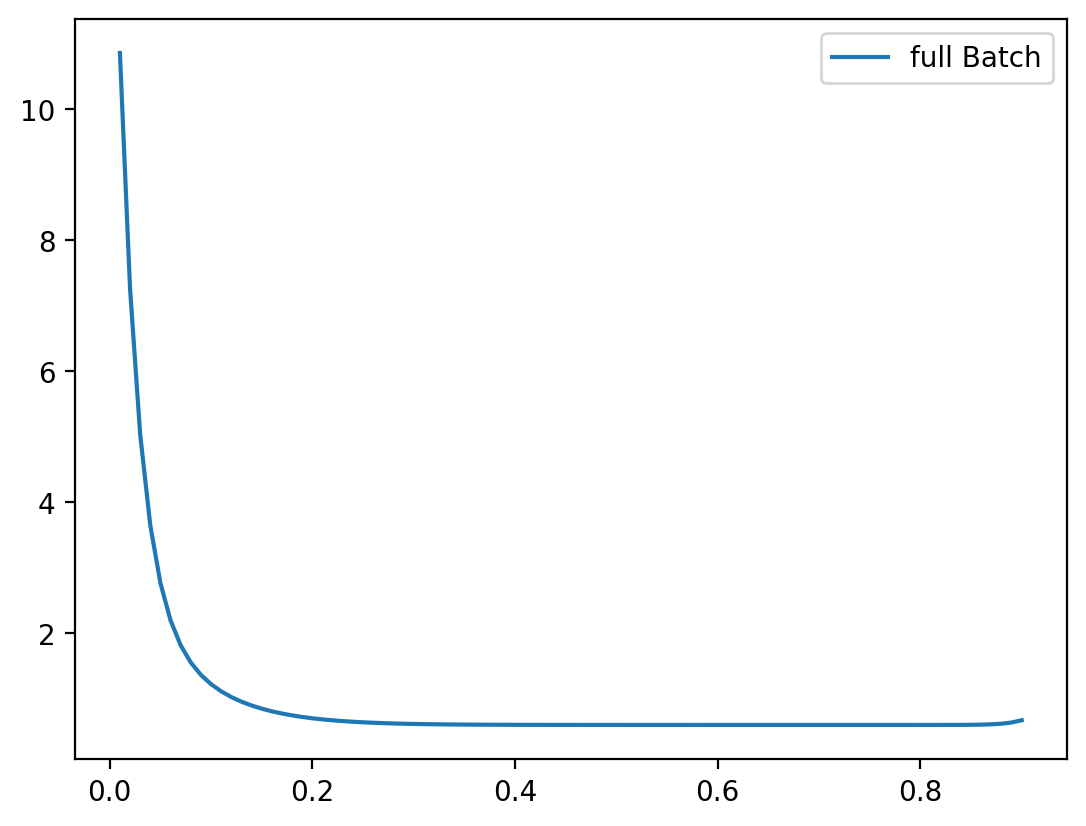

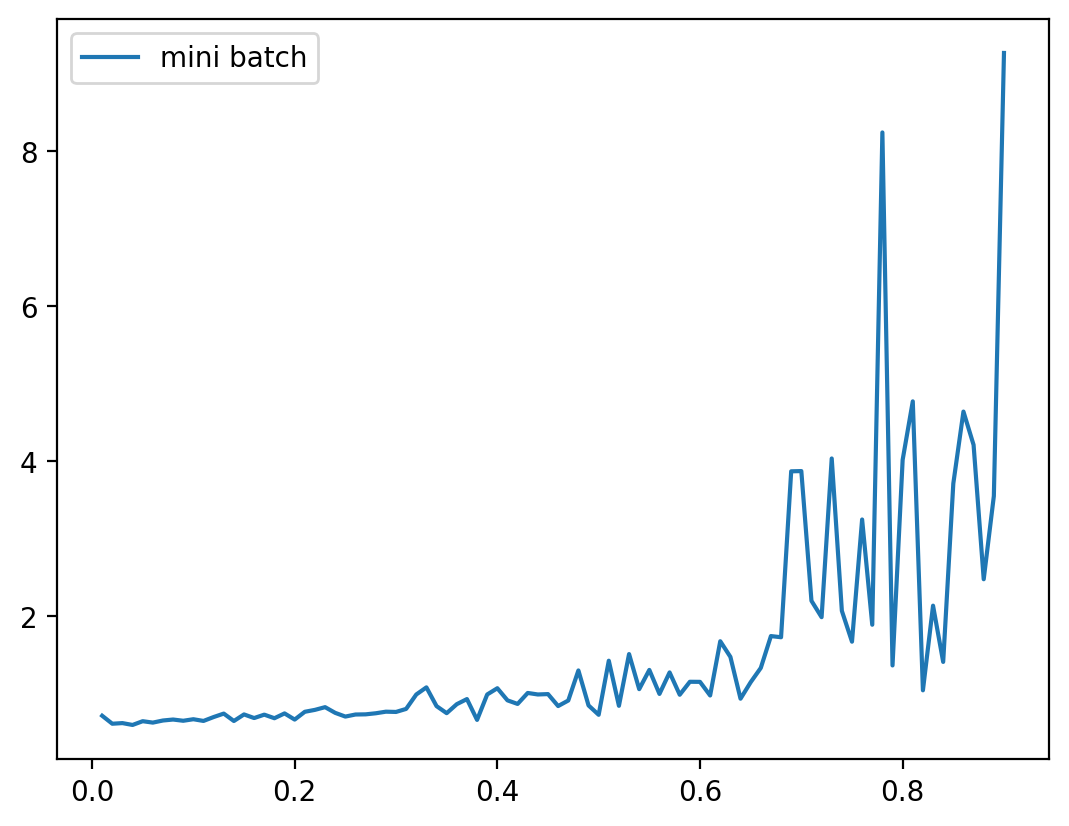

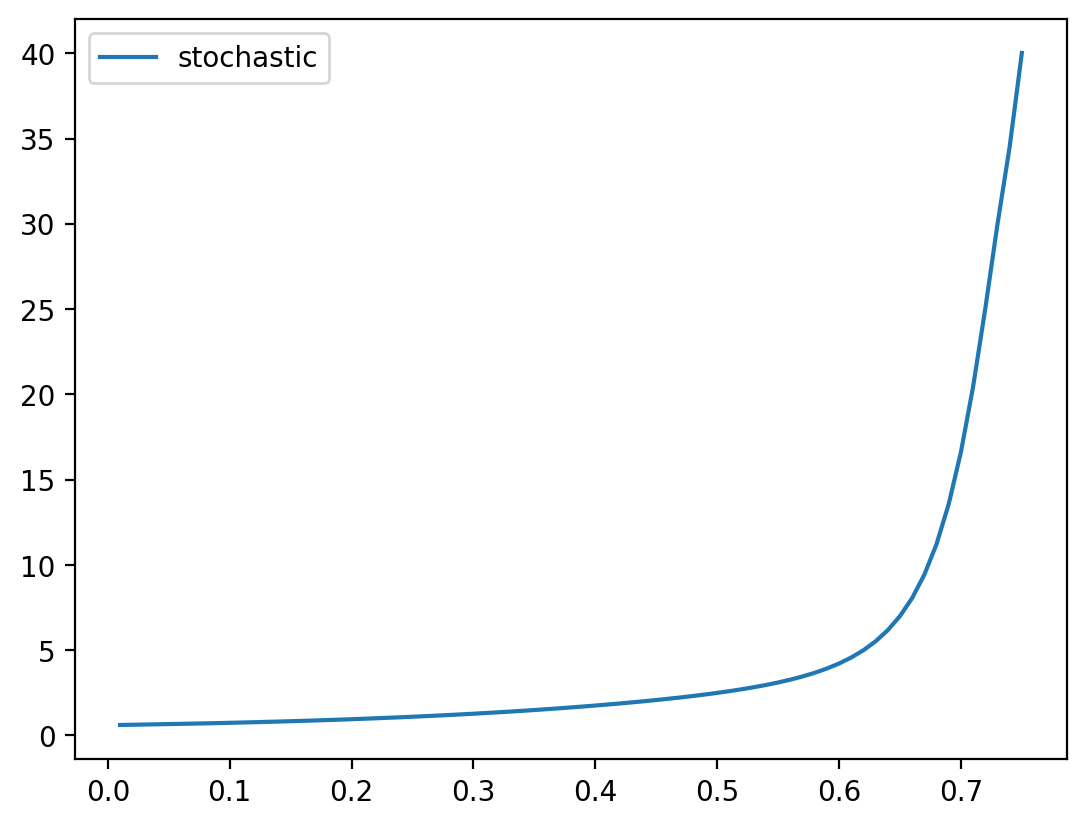

at Optimum lr:0.74, full batch has a loss of 0.5957547919676254
at Optimum lr:0.04, mini batch has a loss of 0.5970817423345295
at Optimum lr:0.01, stoc batch has a loss of 0.6141340064571434


In [69]:
learning_rates = np.arange(0.01,1,0.01)
loss_full= []
loss_mini = []
loss_stoc = []
for lr in learning_rates:
    theta_0 = torch.tensor(0.0,requires_grad=True)
    theta_1 = torch.tensor(0.0,requires_grad=True)
    # print(f'For learing rate {lr} :')
    losses_full,_,_,_,_= full_batch_grad(x1_torch, y_torch,theta_0,theta_1,lr =lr,epochs = 15)
    losses_mini,_,_,_,_= mini_batch_grad(x1_torch,y_torch,theta_0,theta_1,lr = lr,epochs = 15)
    losses_stoc,_,_,_,_= stochastic_grad(x1_torch,y_torch,theta_0,theta_1,lr = lr,epochs = 15)
    loss_full.append(losses_full[-1])
    loss_mini.append(losses_mini[-1])
    loss_stoc.append(losses_stoc[-1])

plt.plot(learning_rates[:90],loss_full[:90],label = 'full Batch')
plt.legend()  
plt.show()
plt.plot(learning_rates[:90],loss_mini[:90], label = 'mini batch')
plt.legend()  
plt.show()
plt.plot(learning_rates[:75],loss_stoc[:75], label = 'stochastic')
plt.legend()  
plt.show()

i = np.argmin(loss_full)
j = np.argmin(loss_mini)
k = np.argmin(loss_stoc[:80])
opt_lr_full = learning_rates[i]
opt_lr_mini = learning_rates[j]
opt_lr_stoc = learning_rates[k]
# print(learning_rates)
print(f'at Optimum lr:{learning_rates[i]}, full batch has a loss of {loss_full[i]}')
print(f'at Optimum lr:{learning_rates[j]}, mini batch has a loss of {loss_mini[j]}')
print(f'at Optimum lr:{learning_rates[k]}, stoc batch has a loss of {loss_stoc[k]}')

Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of $\epsilon$ (or $\epsilon$-neighborhood)  from the minimum value of the loss function.

In [70]:
import torch
np.random.set_state(rs)
# Function to calculate the average number of iterations
def calculate_average_iterations(method, x, y, num_runs=100, lr=0.05, epsilon=0.001, epochs=None, batch_size=2):
    total_iterations = 0
    for _ in range(num_runs):
        rand_theta_0 = torch.tensor(np.random.rand()*100, requires_grad=True)
        rand_theta_1 = torch.tensor(np.random.rand()*100, requires_grad=True)
        # print(rand_theta_0,rand_theta_1)
        if method == 'full_batch':
            losses, _, _, _, _ = full_batch_grad(x, y,rand_theta_0,rand_theta_1, lr=opt_lr_full, epsilon=epsilon, epochs=epochs)
        elif method == 'mini_batch':
            losses, _, _, _, _ = mini_batch_grad(x, y,rand_theta_0,rand_theta_1, lr=opt_lr_mini, batch_size=batch_size, epsilon=epsilon, epochs=epochs)
        elif method == 'stochastic':
            losses, _, _, _, _ = stochastic_grad(x, y,rand_theta_0,rand_theta_1, lr=opt_lr_stoc, epsilon=epsilon, epochs=epochs)
        else:
            raise ValueError("Unknown method")

        # Get the number of iterations from the length of the losses array
        total_iterations += len(losses)
        # print(losses)

    # Calculate the average number of iterations
    average_iterations = total_iterations / num_runs
    return average_iterations

# Example usage
# Assuming you have x and y tensors defined and loaded with data

num_runs = 100
avg_iters_full_batch = calculate_average_iterations('full_batch', x1_torch, y_torch, num_runs)
avg_iters_mini_batch = calculate_average_iterations('mini_batch', x1_torch, y_torch, num_runs)
avg_iters_stochastic = calculate_average_iterations('stochastic', x1_torch, y_torch, num_runs)

print(f"Average Epochs to converge for Full Batch Gradient Descent: {avg_iters_full_batch}")
print(f"Average Epochs to converge for Mini Batch Gradient Descent: {avg_iters_mini_batch}")
print(f"Average Epochs to converge for Stochastic Gradient Descent: {avg_iters_stochastic}")


Average Epochs to converge for Full Batch Gradient Descent: 13.56
Average Epochs to converge for Mini Batch Gradient Descent: 17.84
Average Epochs to converge  for Stochastic Gradient Descent: 16.0


Which optimization process takes a larger number of epochs to converge, and why?

Mini Batch Gradient Descent requires more epochs to converge because it averages over fewer samples than full-batch while still introducing some noise, which slows convergence compared to the other methods.

Visualize the convergence process for 15 epochs

In [74]:
losses_full,theta_0_full, theta_1_full, t0_hist_full, t1_hist_full = full_batch_grad(x1_torch, y_torch,theta_0,theta_1,lr =opt_lr_full,epochs = 15)
losses_mini,theta_0_mini, theta_1_mini, t0_hist_mini, t1_hist_mini = mini_batch_grad(x1_torch,y_torch,theta_0,theta_1,lr = opt_lr_mini,epochs = 15)
losses_stoc,theta_0_stoc, theta_1_stoc, t0_hist_stoc, t1_hist_stoc = stochastic_grad(x1_torch,y_torch,theta_0,theta_1,lr = opt_lr_stoc,epochs = 15)

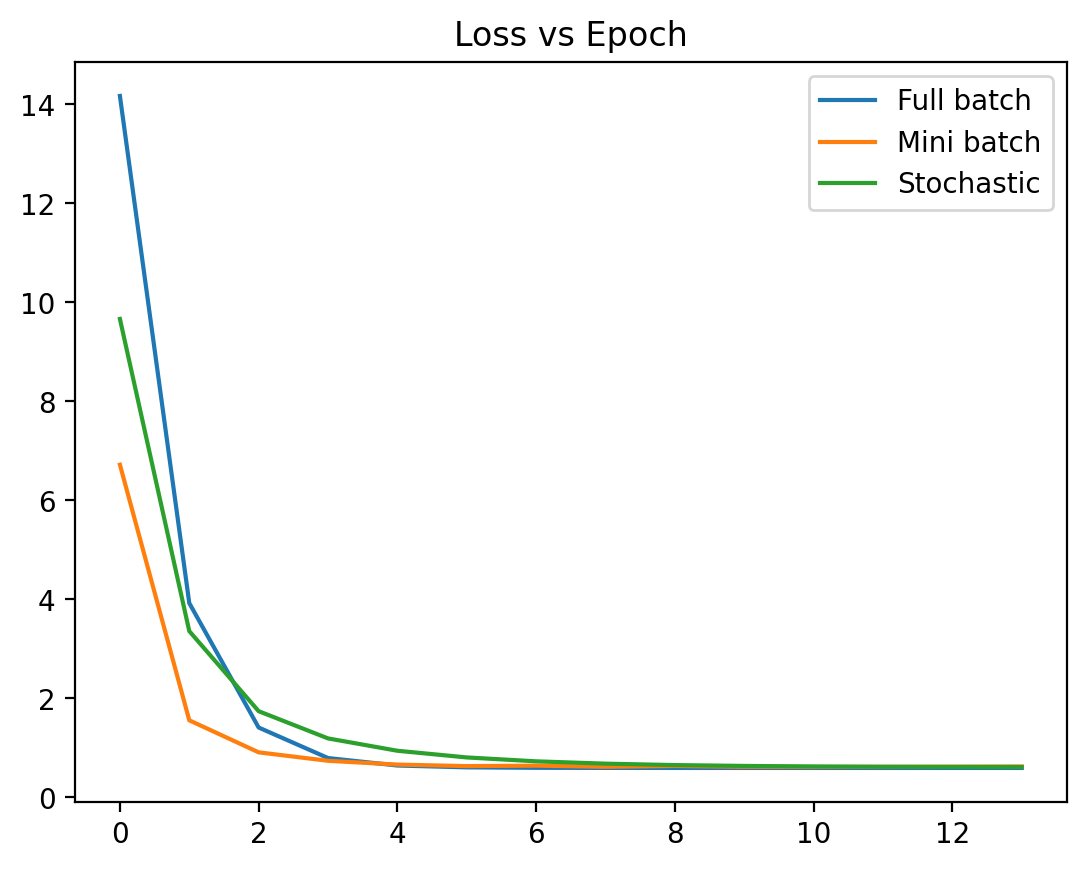

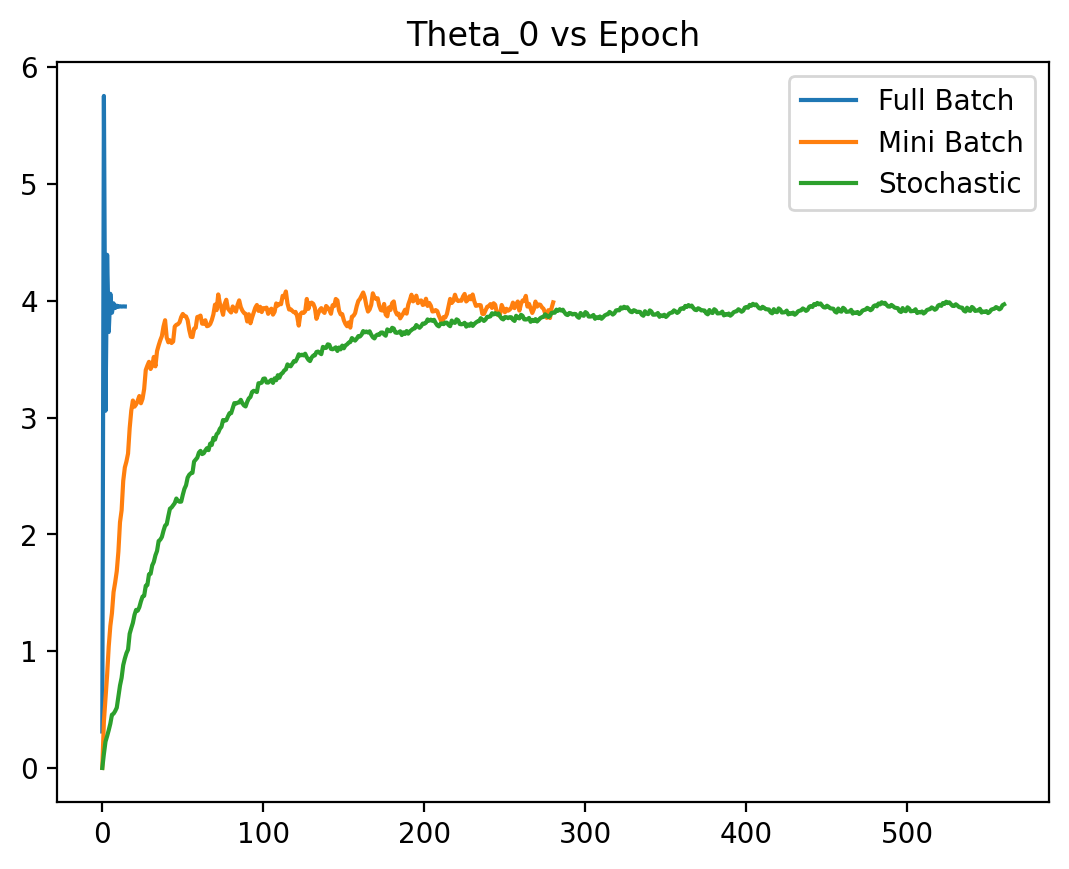

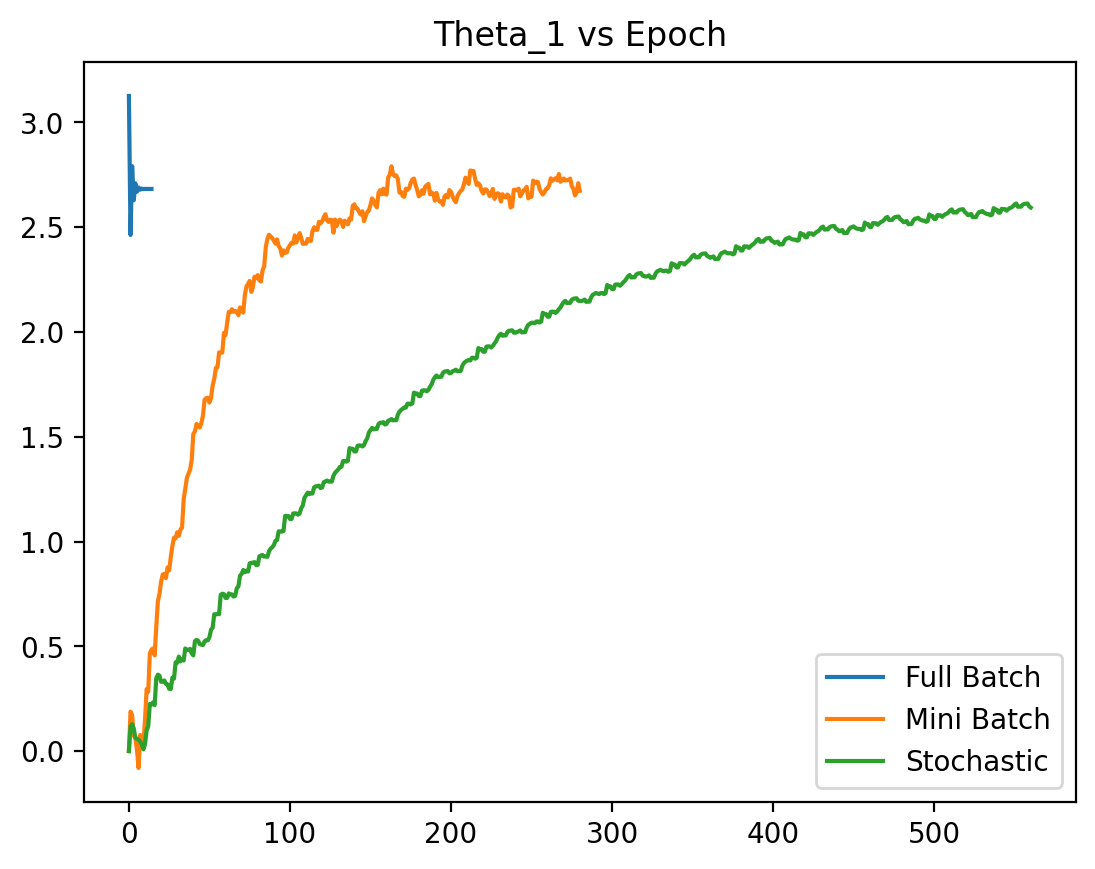

In [75]:
np.random.seed(45)
plt.plot(losses_full, label = 'Full batch')
plt.plot(losses_mini, label = 'Mini batch')
plt.plot(losses_stoc, label = 'Stochastic')
plt.legend()
plt.title('Loss vs Epoch')
plt.show()
plt.plot(t0_hist_full, label = 'Full Batch')
plt.plot(t0_hist_mini, label = 'Mini Batch')
plt.plot(t0_hist_stoc, label = 'Stochastic')
plt.legend()
plt.title('Theta_0 vs Epoch')
plt.show()
plt.plot(t1_hist_full, label = 'Full Batch')
plt.plot(t1_hist_mini, label = 'Mini Batch')
plt.plot(t1_hist_stoc, label = 'Stochastic')
plt.legend()
plt.title('Theta_1 vs Epoch')
plt.show()

In [11]:
theta0_range = np.linspace(-2, 8, 100)
theta1_range = np.linspace(-1, 6, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)
loss_grid = np.zeros_like(theta0_grid)
for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = reg(x1_torch, theta0_grid[i,j], theta1_grid[i,j])
        loss_grid[i, j] = mse(y_hat, y_torch)

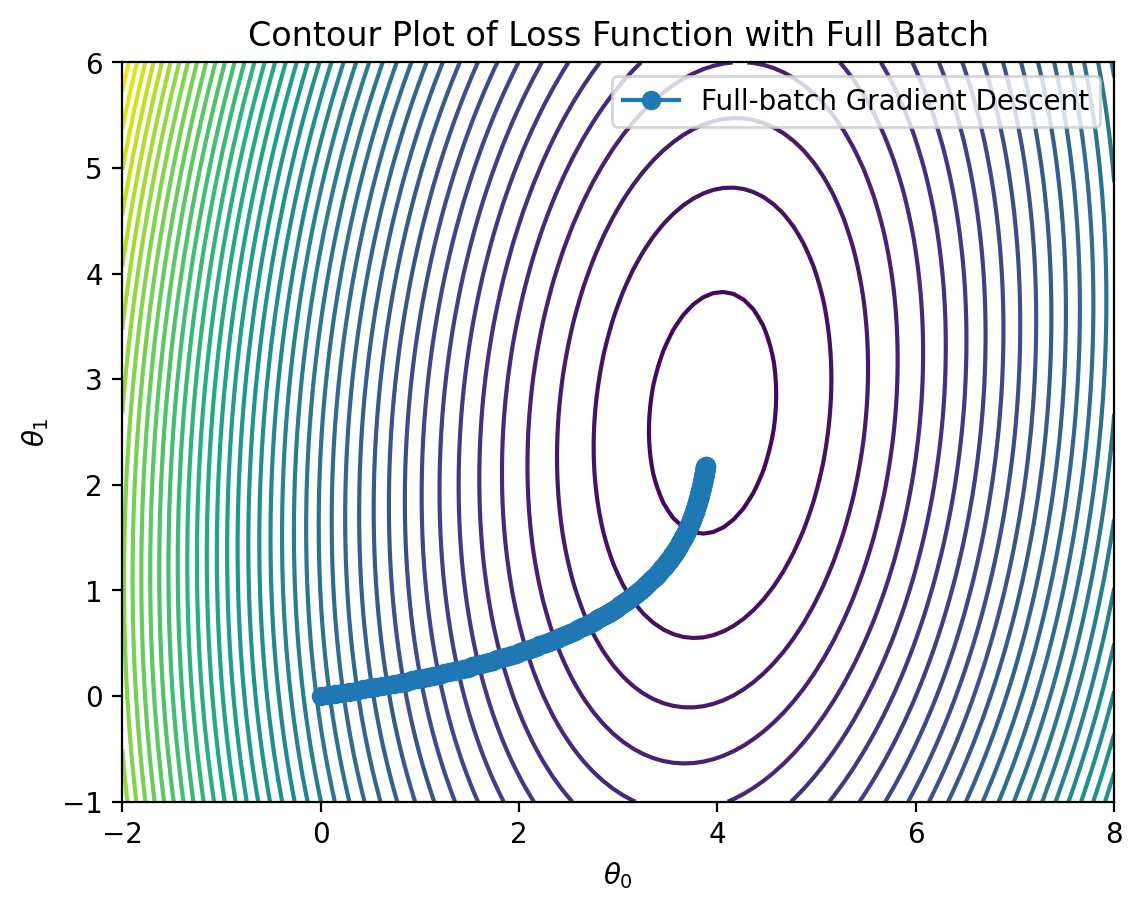

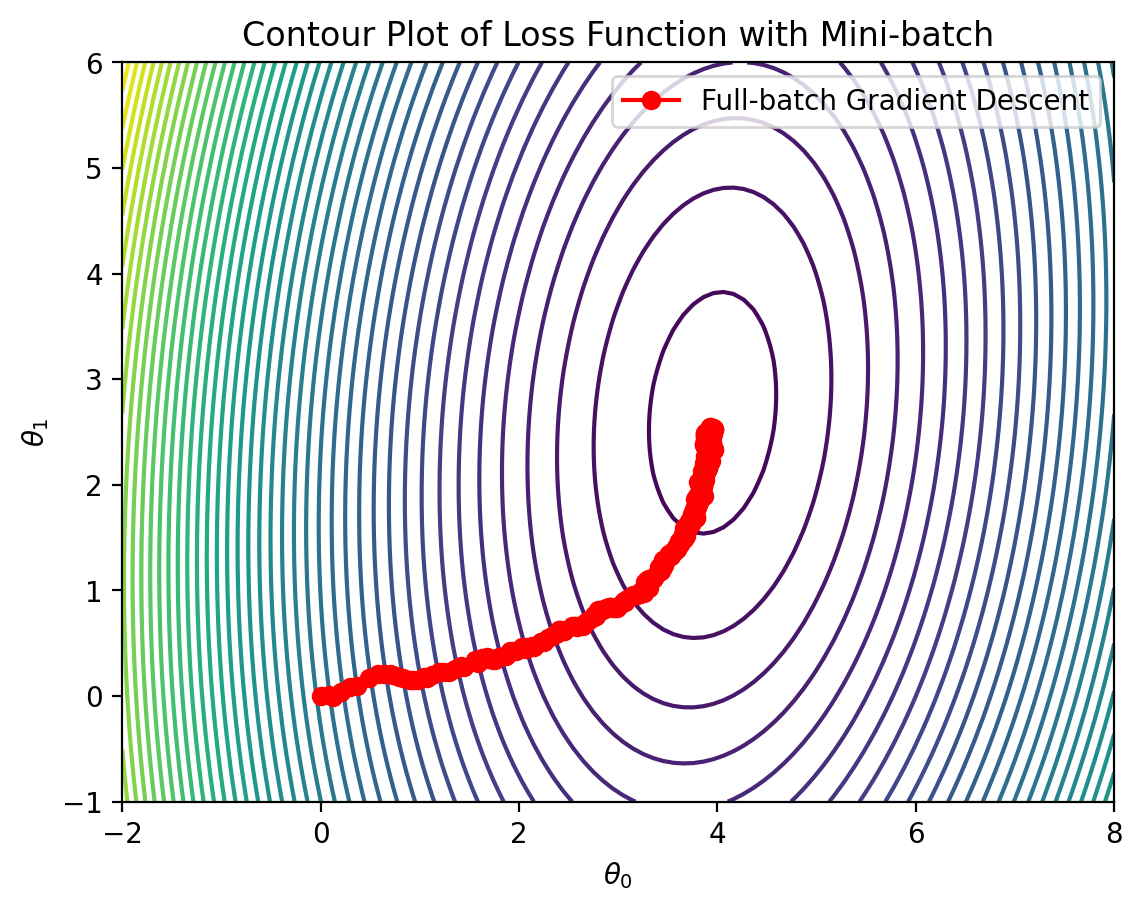

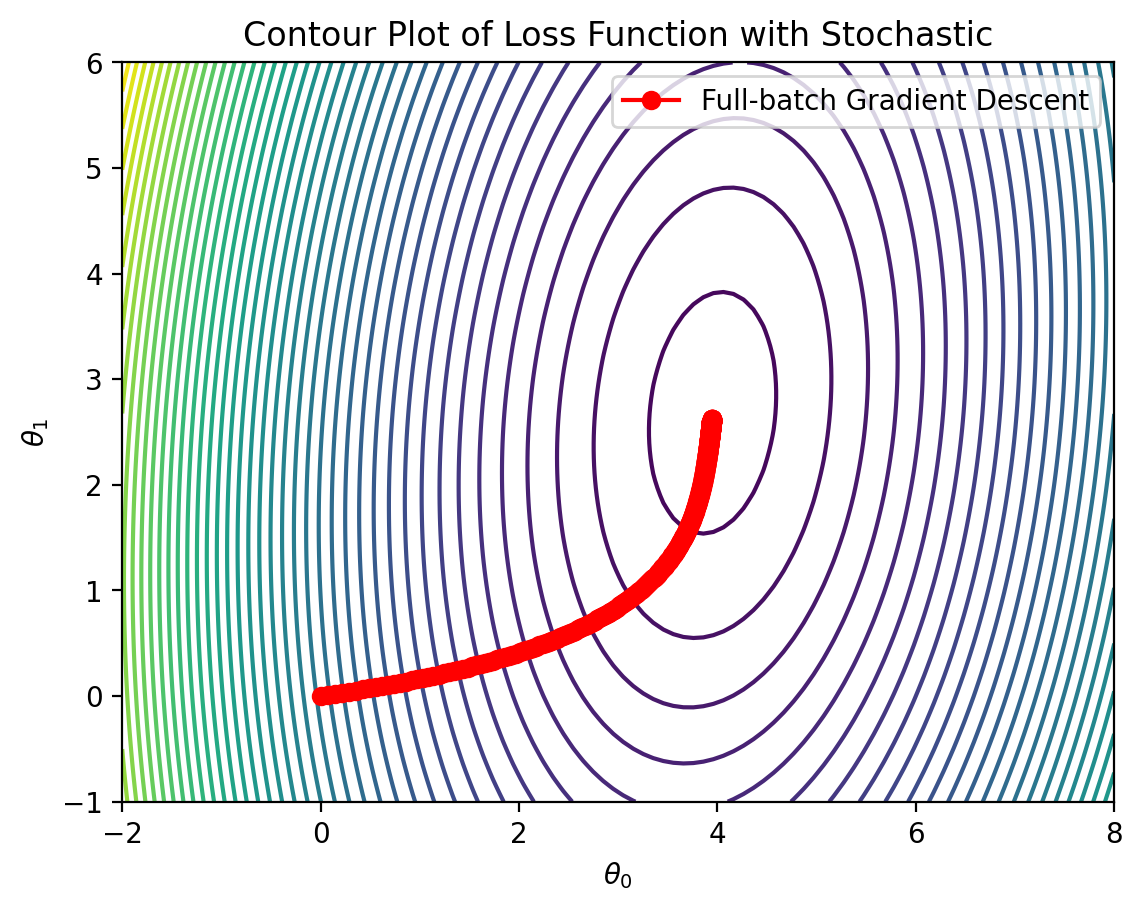

In [12]:
# plt.figure(figsize=(10, 6))
plt.contour(theta0_grid, theta1_grid, loss_grid, levels=50, cmap='viridis')
plt.plot(t0_hist_full, t1_hist_full, marker='o', label='Full-batch Gradient Descent')
# plt.plot(t0_hist_mini, t1_hist_mini, marker='o', label='Mini-batch Gradient Descent')
# plt.plot(t0_hist_stoc, t1_hist_stoc, marker='o', label='Stochastic Gradient Descent')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Contour Plot of Loss Function with Full Batch')
plt.legend()
plt.show()
# plt.figure(figsize=(10, 6))
plt.contour(theta0_grid, theta1_grid, loss_grid, levels=50, cmap='viridis')
plt.plot(t0_hist_mini, t1_hist_mini, marker='o', color='r', label='Full-batch Gradient Descent')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Contour Plot of Loss Function with Mini-batch')
plt.legend()
plt.show()

# plt.figure(figsize=(10, 6))
plt.contour(theta0_grid, theta1_grid, loss_grid, levels=50, cmap='viridis')
plt.plot(t0_hist_stoc, t1_hist_stoc, marker='o', color='r', label='Full-batch Gradient Descent')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Contour Plot of Loss Function with Stochastic')
plt.legend()
plt.show()

In [13]:
# from matplotlib.animation import FuncAnimation
# fig, ax = plt.subplots(figsize=(10, 6))
# contour = ax.contour(theta0_grid, theta1_grid, loss_grid, levels=50, cmap='viridis')
# line, = ax.plot([], [], 'r-o', label='Gradient Descent Path')
# ax.set_xlabel(r'$\theta_0$')
# ax.set_ylabel(r'$\theta_1$')
# ax.set_title('Contour Plot of Loss Function with Optimization Path')
# ax.legend()
# def init():
#     line.set_data([], [])
#     return line,

# # Update function for the animation
# def update(i):
#     line.set_data(t0_hist_full[:i+1], t1_hist_full[:i+1])
#     return line,

# # Create the animation
# ani = FuncAnimation(fig, update, frames=len(t0_hist_full), init_func=init, blit=True, repeat=False)
# ani.save('Full_batch_grad.gif', writer='imagemagick')
# plt.show()

In [14]:
def grad_momentum(x,y,lr = 0.01,epsilon = 0.001,epochs = None,momentum = 0.3):
    theta_0 = torch.tensor(0.0,requires_grad=True)
    theta_1 = torch.tensor(0.0,requires_grad=True)
    t0_hist = [theta_0.item()]
    t1_hist = [theta_1.item()]
    losses = []
    epoch = 1
    loss = torch.tensor(float('inf'))
    change0 = 0
    change1 = 0
    if epochs is not None:
        while True:
            y_hat = reg(x,theta_0,theta_1)
            loss = mse(y_hat,y)
            losses.append(loss.item())
            loss.backward()
            with torch.no_grad():
                change0 = lr*theta_0.grad +momentum*change0
                change1 = lr*theta_1.grad +momentum*change1
                theta_0.data -= change0
                theta_1.data -= change1

            t0_hist.append(theta_0.item())
            t1_hist.append(theta_1.item())
            # print(f'Epoch:{epoch}--> Loss:{loss.item()}')
            theta_0.grad.zero_()
            theta_1.grad.zero_()
            epoch += 1
            if epoch>=epochs:
                break
            # if epoch>=400 and epoch%50 == 0:
            #     if losses[-5:].count(losses[-1])== 5:
            #         break
            # if len(losses) >2:
            #     if losses[-1]-losses[-2]<epsilon:
            #         break
    else:
        while True:
            y_hat = reg(x,theta_0,theta_1)
            loss = mse(y_hat,y)
            losses.append(loss)
            loss.backward()
            with torch.no_grad():
                change0 = lr*theta_0.grad +momentum*change0
                change1 = lr*theta_1.grad +momentum*change1
                theta_0.data -= change0
                theta_1.data -= change1

            t0_hist.append(theta_0.item())
            t1_hist.append(theta_1.item())
            # print(f'Epoch:{epoch}--> Loss:{loss.item()}')
            theta_0.grad.zero_()
            theta_1.grad.zero_()
            epoch += 1
            # if epoch>=400 and epoch%50 == 0:
            #     if losses[-5:].count(losses[-1])== 5:
            #         break
            if len(losses) >2:
                if losses[-1]-losses[-2]<epsilon:
                    break
                
    print(f'Gradient Descent with Momentum---->No of Epochs Caliculated:{epoch} Final loss:{losses[-1]}')
    return losses, theta_0.grad.item(), theta_1.grad.item(),t0_hist,t1_hist



losses_p, theta_0_p, theta_1_p, t0_hist_p, t1_hist_p = grad_momentum(x1_torch,y_torch,epochs=15)

Gradient Descent with Momentum---->No of Epochs Caliculated:15 Final loss:9.220210777701597


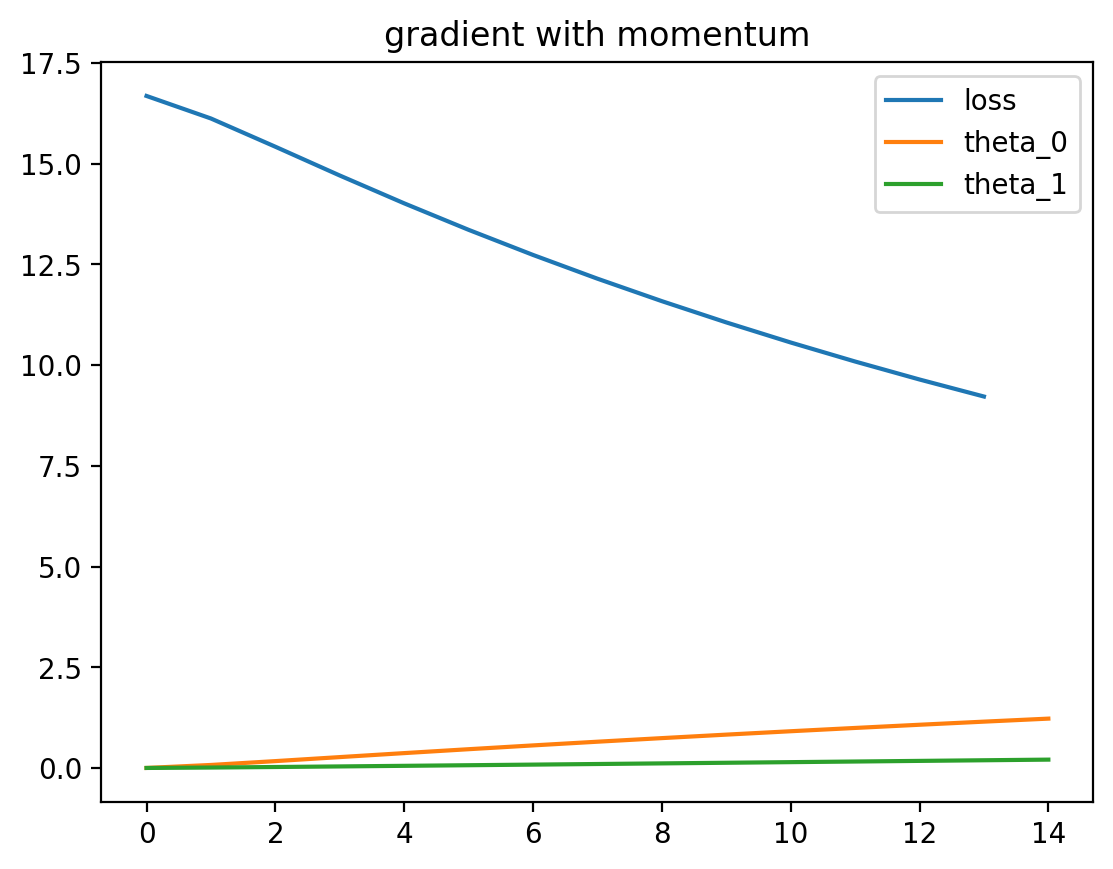

In [15]:
plt.plot(losses_p, label = 'loss')
plt.plot(t0_hist_p, label = 'theta_0')
plt.plot(t1_hist_p, label = 'theta_1')
plt.legend()
plt.title('gradient with momentum')
plt.show()

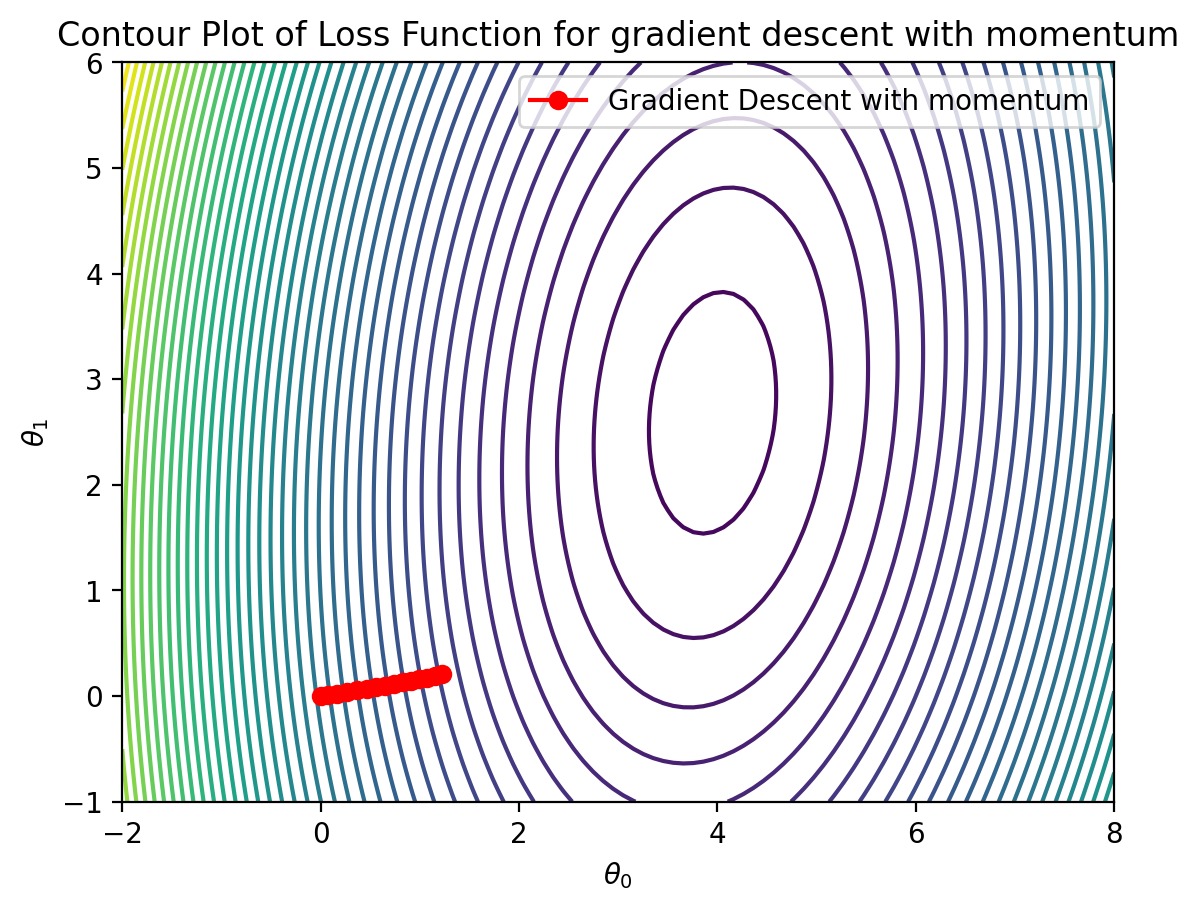

In [16]:
plt.contour(theta0_grid, theta1_grid, loss_grid, levels=50, cmap='viridis')
plt.plot(t0_hist_p, t1_hist_p, marker='o', color='r', label='Gradient Descent with momentum')
# plt.plot(t0_hist_full, t1_hist_full, marker='o', label='Full-batch Gradient Descent')
# plt.plot(t0_hist_mini, t1_hist_mini, marker='o', label='Mini-batch Gradient Descent')
# plt.plot(t0_hist_stoc, t1_hist_stoc, marker='o', label='Stochastic Gradient Descent')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Contour Plot of Loss Function for gradient descent with momentum')
plt.legend()
plt.show()